# Pivot Tables in Python
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/

In [1]:
import pandas as pd
df = pd.read_excel("D:/Projects/JupyterNotebookFiles/Python Fundamentals/Database in Python/Datasets/sample_pivot.xlsx", parse_dates=['Date'])
df.head()

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425
3,2020-02-28,East,Children's Clothing,26.0,832
4,2020-03-19,West,Women's Clothing,3.0,33


## Creating a Pivot Table in Pandas

In [2]:
sales_by_region = pd.pivot_table(df, index = 'Region', values = 'Sales')
sales_by_region

,Sales
Region,
East,408.182482
North,438.924051
South,432.956204
West,452.029412


### The sum of all Sales across a region

In [3]:
total_by_region = pd.pivot_table(df, index = 'Region', values = 'Sales', 
                                 aggfunc='sum')
total_by_region

,Sales
Region,
East,167763
North,138700
South,59315
West,61476


## Filtering Python Pivot Tables

### The mean Sale price by Region

In [4]:
avg_region_price = pd.pivot_table(df, index = 'Region', values = 'Sales')
avg_region_price

,Sales
Region,
East,408.182482
North,438.924051
South,432.956204
West,452.029412


In [5]:
#region where the average sales is greater than 450
avg_region_price[avg_region_price['Sales'] > 450]

,Sales
Region,
West,452.029412


In [6]:
#region where the average sales is greater than 450 and less than 430
avg_region_price[(avg_region_price['Sales'] > 450) | 
                 (avg_region_price['Sales'] < 430)]

,Sales
Region,
East,408.182482
West,452.029412


## Multi-indexing

In [7]:
multi_index = pd.pivot_table(df, index = ['Region', 'Type'], 
                             values = 'Sales', aggfunc = 'sum')
multi_index

Sales
Region Type                      
East   Children's Clothing  45849
       Men's Clothing       51685
       Women's Clothing     70229
North  Children's Clothing  37306
       Men's Clothing       39975
       Women's Clothing     61419
South  Children's Clothing  18570
       Men's Clothing       18542
       Women's Clothing     22203
West   Children's Clothing  20182
       Men's Clothing       19077
       Women's Clothing     22217

 ### The total sum of sales but also the count of sales.

In [8]:
multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], 
                                 values = 'Sales', aggfunc = ['sum', len])
multi_functions

sum   len
                            Sales Sales
Region Type                            
East   Children's Clothing  45849   113
       Men's Clothing       51685   122
       Women's Clothing     70229   176
North  Children's Clothing  37306    85
       Men's Clothing       39975    89
       Women's Clothing     61419   142
South  Children's Clothing  18570    45
       Men's Clothing       18542    39
       Women's Clothing     22203    53
West   Children's Clothing  20182    42
       Men's Clothing       19077    41
       Women's Clothing     22217    53

 ### To see number of units sold by Type and by Region

In [9]:
columns_example = pd.pivot_table(df, index = 'Type', columns = 'Region', 
                                 values = 'Units', aggfunc = 'sum')
columns_example

Region,East,North,South,West
Type,,,,
Children's Clothing,2318.0,1763.0,1017.0,789.0
Men's Clothing,2420.0,0.0,725.0,829.0
Women's Clothing,3372.0,2596.0,1056.0,1006.0


## Plotting Pandas Pivot Tables

<AxesSubplot:xlabel='Type'>

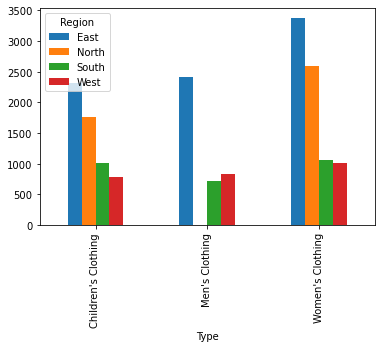

In [10]:
columns_example.plot(kind='bar')

## Handling Missing Data in Python Pivot Tables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


### We can see that Units is the only field with missing values.

In [12]:
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', 
               aggfunc = 'max')

Region,East,North,South,West
Type,,,,
Children's Clothing,35.0,35.0,35.0,34.0
Men's Clothing,35.0,NaN,34.0,35.0
Women's Clothing,35.0,35.0,35.0,33.0


### To replace the NaN value with, suppose 'N/A'

In [13]:
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', 
               aggfunc = 'max', fill_value = 'N/A')

Region,East,North,South,West
Type,,,,
Children's Clothing,35.0,35.0,35.0,34.0
Men's Clothing,35.0,N/A,34.0,35.0
Women's Clothing,35.0,35.0,35.0,33.0


### Adding Totals for Rows and Columns to Pandas Pivot Tables

In [14]:
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', 
      aggfunc = 'sum', fill_value = 'N/A', margins = True, margins_name='Total')

Region,East,North,South,West,Total
Type,,,,,
Children's Clothing,2318.0,1763.0,1017.0,789.0,5887.0
Men's Clothing,2420.0,0.0,725.0,829.0,3974.0
Women's Clothing,3372.0,2596.0,1056.0,1006.0,8030.0
Total,8110.0,4359.0,2798.0,2624.0,17891.0
